In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load CSV data
data = pd.read_csv('potholes.csv')

In [3]:
# Assuming the last column is the target variable and rest are features
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Define and train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
 'n_estimators': [50, 100, 200], #The number of trees in the forest  (100, 200, or 300).
 'max_depth': [None, 5, 10],  # The maximum depth of each tree (None, 10, or 20).
 'min_samples_split': [2, 5, 10], #The minimum number of samples required to split an internal node (2, 5, or 10).
 'min_samples_leaf': [1, 2, 4] # The minimum number of samples required to be at a leaf node (1, 2, or 4).
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5,
scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [7]:
# Initialize the Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)

In [10]:
# Cross-validation
cv_scores = cross_val_score(best_rf_classifier, X_train, y_train, cv=5,
scoring='accuracy')

In [8]:
# Model evaluation
best_rf_classifier.fit(X_train, y_train)
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [11]:
# Print results
print("Best hyperparameters:", best_params)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Test accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(conf_matrix)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Cross-validation scores: [0.99375    0.95       0.9875     0.96875    0.97484277]
Mean CV accuracy: 0.9749685534591196
Test accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       110
           1       1.00      0.96      0.98        90

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200


Confusion Matrix:
[[110   0]
 [  4  86]]


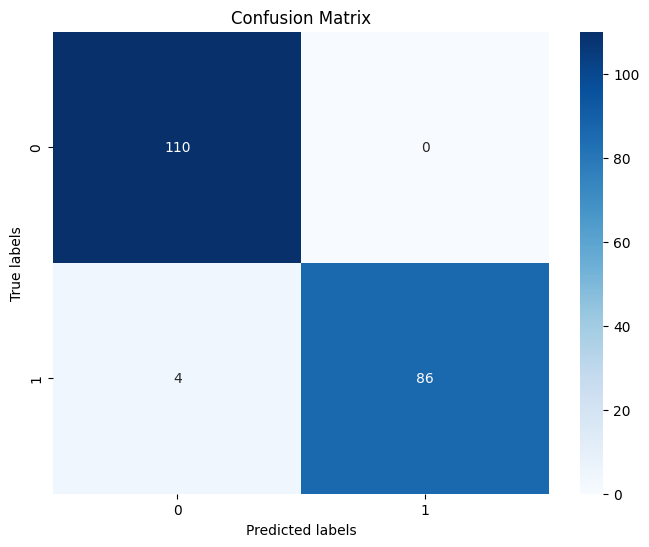

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()